In [43]:
#importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [106]:
reviews = pd.read_csv('C:\Python\dataprep\Olist\olist_order_reviews_dataset.csv')

In [78]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [107]:
reviews.drop(['review_comment_title', 'review_id', 'order_id', 'review_creation_date', 'review_answer_timestamp'], axis = 1, inplace = True)

In [108]:
reviews

,review_score,review_comment_message
0,4,NaN
1,5,NaN
2,5,NaN
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...
...,...,...
99219,5,NaN
99220,5,NaN
99221,5,"Excelente mochila, entrega super rápida. Super..."
99222,4,NaN


In [109]:
#Verificando valores ausentes
reviews.isnull().sum()

review_score                  0
review_comment_message    58247
dtype: int64

In [110]:
#Retirando os dados austentes
reviews = reviews.dropna()
reviews.head()

,review_score,review_comment_message
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...
9,4,aparelho eficiente. no site a marca do aparelh...
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,5,"Vendedor confiável, produto ok e entrega antes..."


In [122]:
# Resetting the reviews index and visualizing the data
reviews = reviews.reset_index(drop=True)
reviews.head()
reviews.shape

,review_score,review_comment_message
0,5,Recebi bem antes do prazo estipulado.
1,5,Parabéns lojas lannister adorei comprar pela I...
2,4,aparelho eficiente. no site a marca do aparelh...
3,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
4,5,"Vendedor confiável, produto ok e entrega antes..."


(40977, 2)

In [149]:
df = reviews

def to_lower(text):
    return text.lower()

df.review_comment_message = df.review_comment_message.apply(to_lower)
df.review_comment_message[0]

'recebi bem antes do prazo estipulado.'

In [124]:
#limpando o texto
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

df.review_comment_message = df.review_comment_message.apply(clean)
df.review_comment_message.head()

2     aparelho eficiente. no site a marca do aparelh...
8                 obrigado pela atençao amim dispensada
10                       relógio muito bonito e barato.
15                                           muito boa 
19    otimo vendedor chegou ate antes do prazo , ado...
Name: review_comment_message, dtype: object

In [125]:
#Removendo caracteres especiais
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

df.review_comment_message = df.review_comment_message.apply(is_special)
df.review_comment_message.head()

2     aparelho eficiente  no site a marca do aparelh...
8                 obrigado pela atençao amim dispensada
10                       relógio muito bonito e barato 
15                                           muito boa 
19    otimo vendedor chegou ate antes do prazo   ado...
Name: review_comment_message, dtype: object

In [126]:
#Gramática
def stem_txt(text):
    ss = SnowballStemmer('portuguese') 
    return " ".join([ss.stem(w) for w in text])

df.review_comment_message = df.review_comment_message.apply(is_special)
df.review_comment_message.head()

2     aparelho eficiente  no site a marca do aparelh...
8                 obrigado pela atençao amim dispensada
10                       relógio muito bonito e barato 
15                                           muito boa 
19    otimo vendedor chegou ate antes do prazo   ado...
Name: review_comment_message, dtype: object

In [131]:
# Mapeando o Sentiment rating
df['Sentiment_rating'] = np.where(df.review_score > 3,1,0)

# Removendo valores neutros
df = df[df.review_score != 3]

# verificando os dados
df['Sentiment_rating'].value_counts()

1    4313
0    1293
Name: Sentiment_rating, dtype: int64

In [133]:
#Criando WordCloud com a categoria 0 - negativo
word_Cloud = df[df['Sentiment_rating'] == 0]
word_Cloud

,review_score,review_comment_message,Sentiment_rating
47,1,comprei tres pacotes de cinco folhas cada de p...,0
79,1,aqui está descrevendo como entregue só que ate...,0
101,1,produto deu defeito na 1 vez de uso,0
103,1,até agora não recebi o produto,0
113,1,produto foi entregue com umas das alças com pr...,0
...,...,...,...
40903,1,recebi meu pedido faltando um kit progressiva ...,0
40910,1,o produto não foi entregue a empresa não se p...,0
40917,1,meu produto não foi entregue ainda,0
40945,2,nao satifez minhas expectativas não funciona ...,0


<Figure size 1440x864 with 0 Axes>

(-0.5, 1999.5, 999.5, -0.5)

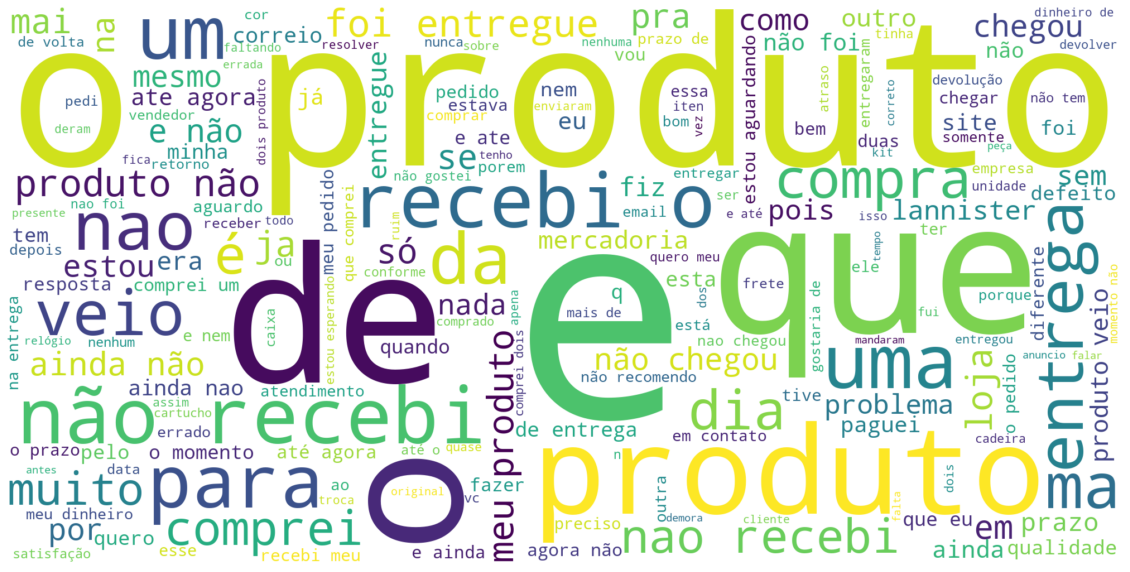

In [92]:
unique_string=(" ").join(word_Cloud['review_comment_message'])
word_cloud2 = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [134]:
#Usando Trigrams(comentário)
co = CountVectorizer(ngram_range=(3,3))
counts = co.fit_transform(df['review_comment_message'])
important_trigrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)
important_trigrams

,0
antes do prazo,417
chegou antes do,139
dentro do prazo,106
bem antes do,81
entregue antes do,74
entregue no prazo,59
entrega no prazo,59
produto muito bom,58
não recebi produto,55
prazo de entrega,51


In [135]:
#Criando a maquina preditiva  a partir do comentário
co_counts = CountVectorizer(ngram_range=(1,4))

co_data = co_counts.fit_transform(df['review_comment_message'])
co_data

<5606x65322 sparse matrix of type '<class 'numpy.int64'>'
	with 123579 stored elements in Compressed Sparse Row format>

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 


from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold


X = co_data
y = df['Sentiment_rating']

lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']
nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'eficiência', 'f1-score']

lista_de_modelos = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7)]

nome_dos_modelos = ['Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (arvs = 50, prof = 5)',
                        'Random Forest (arvs = 50, prof = 7)',
                        'Random Forest (arvs = 100, prof = 5)', 
                        'Random Forest (arvs = 100, prof = 7)']

resultados0 = {}

validacao = StratifiedKFold(n_splits = 10)


for i in range(len(lista_de_modelos)):
    print('Rodando modelo: ' + nome_dos_modelos[i])
    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, bac, f1s]
    
resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T


Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (arvs = 50, prof = 5)
Rodando modelo: Random Forest (arvs = 50, prof = 7)
Rodando modelo: Random Forest (arvs = 100, prof = 5)
Rodando modelo: Random Forest (arvs = 100, prof = 7)


In [140]:
resultados.sort_values(by = 'f1-score', ascending = False)

,acurácia,sensibilidade,precisão,eficiência,f1-score
Regressão Logística,0.913482,0.962904,0.927518,0.855757,0.944823
Bagging,0.901173,0.937864,0.934081,0.858285,0.935918
Árvore (prof = 7),0.884052,0.952007,0.902730,0.804676,0.926637
Árvore (prof = 5),0.874418,0.946442,0.896272,0.790272,0.920609
Árvore (prof = 3),0.871564,0.958728,0.884164,0.769748,0.919910
5-NN,0.841955,0.986322,0.837289,0.673367,0.905688
15-NN,0.813774,0.992813,0.808734,0.604710,0.891354
25-NN,0.800928,0.994435,0.797099,0.574961,0.884887
"Random Forest (arvs = 50, prof = 7)",0.769533,1.000000,0.769492,0.500388,0.869732
"Random Forest (arvs = 100, prof = 7)",0.769533,1.000000,0.769492,0.500385,0.869732


In [143]:
#Separando em treino e teste
X_train, X_test, y_train, y_test= train_test_split(co_data,
                                                   df['Sentiment_rating'],
                                                   test_size = 0.2)

In [138]:
num_folds= 10
seed = 10

#Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)
modelo_cv2 = LogisticRegression()
resultado_cv2 = cross_val_score(modelo_cv2, co_data, df['Sentiment_rating'])
Acuracia_Final2 = resultado_cv2.mean()*(100.00)
Acuracia_Final2

91.29496677431821

# Regressão Logística

In [144]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
test_pred = lr_model.predict(X_test)

print("Acurácia: ", accuracy_score(y_test,test_pred))
print("F1 score: ", f1_score(y_test,test_pred))
print("MC", confusion_matrix(y_test,test_pred))

LogisticRegression()

Acurácia:  0.8957219251336899
F1 score:  0.9348914858096828
MC [[165  75]
 [ 42 840]]


In [150]:
pickle.dump(lr_model,open('model1.pkl','wb'))

In [157]:
rev =  """Há cerca de 02 meses planejei me mudar, a data da mudança ficou para 15 de dezembro , então precisava comprar móveis, escolhi um guarda roupa nova York no site da Magalu, desde isso só tenho tido trastornos e contratempos, quando fiz o pedido do móvel no site falava 12 dias para entrega, após finalizar o pedido, a surpresa, prazo passou para 43 dias, sendo que eu não tinha esse prazo para me mudar, então entrei em contato para ver se conseguiam entregar no prazo para eu conseguir me mudar, a entrega estava prevista para dia 28 de dezembro, então tentaram entregar dia 08 sem avisar, mas era feriado aqui em Aracaju ,o condomínio não liberou a entrega, o pedido voltou, novamente tentaram entregar dia 17 sem avisar, eu estava viajando, consegui ligar para um d emeus amigos receber, logo quando voltei de viagem que chamei o serviço de montagem, assim o o Montadora COMEÇOU A ABRIR O PRIMEIRO PACOTE DE 06,NOTOU QUE HAVIAM TROCADO UM DOS PACOTES, NO LUGAR DAS GAVETAS, PARAFUSOS, PUXADORES, VARÕES ETC .PORQIE NÃO SEI O QUE FALTAVA, MANDARAM UMA MESA, NOTEIBQUE POR BAIXO DE UMA DAS ETIQUETAS ESTAVA O NOME E PEDIDO DE OUTRA PESSOA, ENTREI IMEDIATAMENTE EM CONTATO COM A LOJA , OS MESMOS ORIENTARAM A ABRIR OS DEMAIS PACOTES OARA VER SE ESTAVA TUDO OK, ATÉ ENTÃO SIM , SO HAVIA PEQUENOS ARRANHÕES DEVIDO AO TRASPORTE DA LOJA PARCEIRA DA MAGALU MADEIRA MADEIRA, FIZ O PEDIDO DE TEICA DOS PACOTES DESDE ESSE DIA 22 DE DEZEMBRO, ESTOU SEM RETORNO, NINGUÉM ME DIZ O DIA CERTO que vão trocar os pacotes errados, estou sem poder me mudar pq dependo do guarda roupa, minhas coisas estão espalhadas pelo quarto, vou ter que pagar mais um mês de aluguel onde estou, é um descaso, me.ligaram dizendo que viriam buscar o pacote há dois dias até hoje nada eu presa em casa sem poder ir trabalhar, ninguém me liga pra me dar uma certeza, fora que tive que pagar pelo serviço do Montadora ,porque achava que estavam todas as peças, e como é agendado ele cobrou o valor da montagem por causa do transporte, dia perdido dele também. Ninguém me dá uma posição já vão em mais de 10 ligações nada. Meu pacote 4/6 está perdido, trocado por uma mesa, pacote 4/4 de alguém de Pernambuco , eu sendo de Aracaju, Sergipe."""
f1 = clean(rev)
f2 = is_special(f1)
f3 = to_lower(f2)
f4 = stem_txt(f3)

bow,words = [],word_tokenize(f4)
for word in words:
    bow.append(words.count(word))

word_dict = cv.vocabulary_
pickle.dump(word_dict,open('bow.pkl','wb'))

inp = []
for i in word_dict:
    inp.append(f4.count(i[0]))
y_pred = lr_model.predict(np.array(inp).reshape(1,1000))
y_pred

ValueError: X has 1000 features per sample; expecting 65322

# Naive Bayes

In [98]:
X = np.array(df.iloc[:,0].values)
y = np.array(df.Sentiment_rating.values)
cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(df.review_comment_message).toarray()
print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (5606, 1000)
y.shape =  (5606,)


In [99]:
trainx,testx,trainy,testy = train_test_split(X,y,test_size=0.2)
print("Train shapes : X = {}, y = {}".format(trainx.shape,trainy.shape))
print("Test shapes : X = {}, y = {}".format(testx.shape,testy.shape))

Train shapes : X = (4484, 1000), y = (4484,)
Test shapes : X = (1122, 1000), y = (1122,)


In [100]:
trainy

array([1, 0, 1, ..., 1, 1, 1])

In [101]:
gb_NB = GaussianNB()
M_NB = MultinomialNB()
B_NB = BernoulliNB()

In [102]:
y_pred_gb = gb_NB.fit(trainx,trainy).predict(testx)
y_pred_M = M_NB.fit(trainx,trainy).predict(testx)
y_pred_B = B_NB.fit(trainx,trainy).predict(testx)

y_pred_gb
y_pred_M
y_pred_B

array([0, 1, 1, ..., 1, 0, 1])

array([0, 1, 0, ..., 1, 0, 1])

array([0, 1, 1, ..., 1, 0, 1])

In [103]:
print("Gaussian = ",accuracy_score(testy,y_pred_gb))
print("Multinomial = ",accuracy_score(testy,y_pred_M))
print("Bernoulli = ",accuracy_score(testy,y_pred_B))

Gaussian =  0.8520499108734403
Multinomial =  0.9090909090909091
Bernoulli =  0.8787878787878788


# Cross Validation

In [104]:
from sklearn.model_selection import KFold, cross_val_score
num_folds= 50
seed = 10

#Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)
modelo_CV = LogisticRegression()
resultado_cv = cross_val_score(modelo_CV, X, y, cv=kfold)
Acurácia_Final = resultado_cv.mean()*100

C:\app\anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass shuffle=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [105]:
print(Acurácia_Final)

91.42003792667509


# Random Forest  

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
df['Sentiment_rating'].value_counts()

1    4313
0    1293
Name: RatingCategory, dtype: int64

In [63]:
df.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
RatingCategory             0
dtype: int64

In [64]:
Features = df
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    label = LabelEncoder()
    Features[col] = label.fit_transform(Features[col])

In [65]:
Features.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,RatingCategory
0,2930,4120,4,364,451,4339,1
1,319,2673,5,2761,294,2214,1
2,4908,2291,5,3779,403,3607,1
3,721,3868,5,2018,396,3573,1
4,2980,3961,5,2895,111,486,1


In [66]:
X_trainF, X_testF, y_trainF, y_testF = train_test_split(df.drop('Sentiment_rating',axis=1),df['Sentiment_rating'],test_size=0.2)

In [67]:
X_trainF.shape,X_testF.shape

((4484, 6), (1122, 6))

In [68]:
y_trainF.shape,y_testF.shape

((4484,), (1122,))

In [69]:
#Instanciando o classificador
random_clf = RandomForestClassifier()
#Treinando o modelo
random_clf.fit(X_trainF,y_trainF)

RandomForestClassifier()

In [70]:
#predizendo as classes a partir do modelo treinado usando o conjunto teste
resultado_RF = random_clf.predict(X_testF)
resultado_RF

array([0, 1, 1, ..., 1, 1, 1])

In [71]:
#Métricas de validação
from sklearn import metrics
print(metrics.classification_report(y_testF,resultado_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       865

    accuracy                           1.00      1122
   macro avg       1.00      1.00      1.00      1122
weighted avg       1.00      1.00      1.00      1122

